## **A. Importing Libraries**

In [1]:
import pandas as pd
import numpy as np

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

#Regression Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

## **B. Loading Dataset**

In [2]:
df = pd.read_csv("/content/bank.csv", delimiter=';')
# df = pd.read_csv("/content/bank-full.csv", delimiter=';')

## **C. Dataset Initial Check**

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4191 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4191 non-null   int64 
 1   job        4191 non-null   object
 2   marital    4191 non-null   object
 3   education  4191 non-null   object
 4   default    4191 non-null   object
 5   balance    4191 non-null   int64 
 6   housing    4191 non-null   object
 7   loan       4191 non-null   object
 8   contact    4191 non-null   object
 9   day        4191 non-null   int64 
 10  month      4191 non-null   object
 11  duration   4191 non-null   int64 
 12  campaign   4191 non-null   int64 
 13  pdays      4191 non-null   int64 
 14  previous   4191 non-null   int64 
 15  poutcome   4191 non-null   object
 16  y          4191 non-null   object
dtypes: int64(7), object(10)
memory usage: 589.4+ KB


In [ ]:
df.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [ ]:
#Print the number of unique values in each column
for column in df.columns:
    print(f'{column} : {len(df[column].unique())}')

age : 67
job : 12
marital : 3
education : 4
default : 2
balance : 2353
housing : 2
loan : 2
contact : 3
day : 31
month : 12
duration : 875
campaign : 32
pdays : 292
previous : 24
poutcome : 4
y : 2


## **D. Data Cleaning Process**

### **1. Missing Values**

Checking for missing values

In [ ]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


### **2. Removing Duplicate Rows (If they exist)**

In [3]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

### **3. Check For Unique Values in each column with Categorical Data**

Necessary to ensure that there are no inconsistencies in categorical data inputs (like spelling mistakes).

In [ ]:
# Job Type Column
print(df['job'].unique())

['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']


In [ ]:
# Marital Status Column
print(df['marital'].unique())

['married' 'single' 'divorced']


In [ ]:
# Education Level Column
print(df['education'].unique())

['primary' 'secondary' 'tertiary' 'unknown']


In [ ]:
# Has Default Credit Column
print(df['default'].unique())

['no' 'yes']


In [ ]:
# Has Housing Loan Column
print(df['housing'].unique())

['no' 'yes']


In [ ]:
# Has Personal Loan Column
print(df['loan'].unique())

['no' 'yes']


In [ ]:
# Contact Type Column
print(df['contact'].unique())

['cellular' 'unknown' 'telephone']


In [ ]:
# Month Column
print(df['month'].unique())

['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']


In [ ]:
# Previous Marketing Campaign Outcome - Column
print(df['poutcome'].unique())

['unknown' 'failure' 'other' 'success']


In [ ]:
# Has Client Subscribed - Column
print(df['y'].unique())

['no' 'yes']


### **4. Identify and Remove Outliers**

In [4]:
def remove_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [5]:
if 'duration' in df.columns:
    df = remove_outliers('duration')

## **E. Analysis**

### **1. Call Duration Distribution**

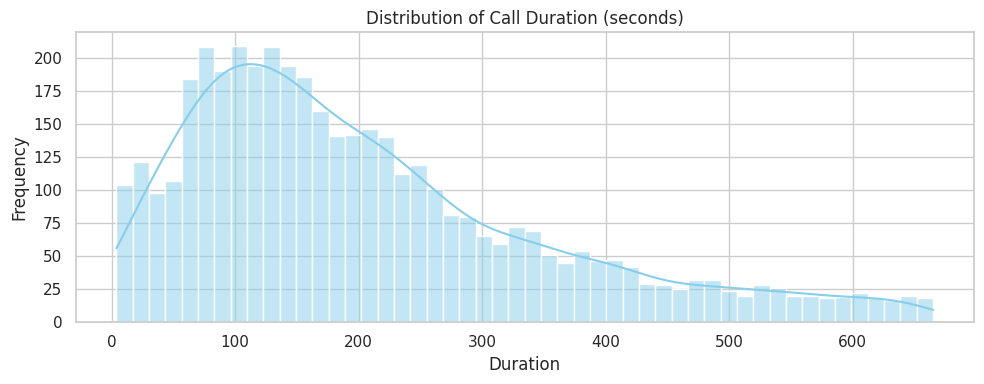

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 4))
sns.histplot(df['duration'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Call Duration (seconds)')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Observations:**

1. Most calls are short, with a large number of durations falling under 500 seconds.

2. A few calls lasted up to 3000+ seconds.

3. There’s a noticeable peak in calls around 100–200 seconds.

4. Longer calls tend to indicate more engaged conversations and could positively impact the likelihood of a client subscribing to a term deposit.

### **2. Last Since Contacted (Pdays) Distribution**

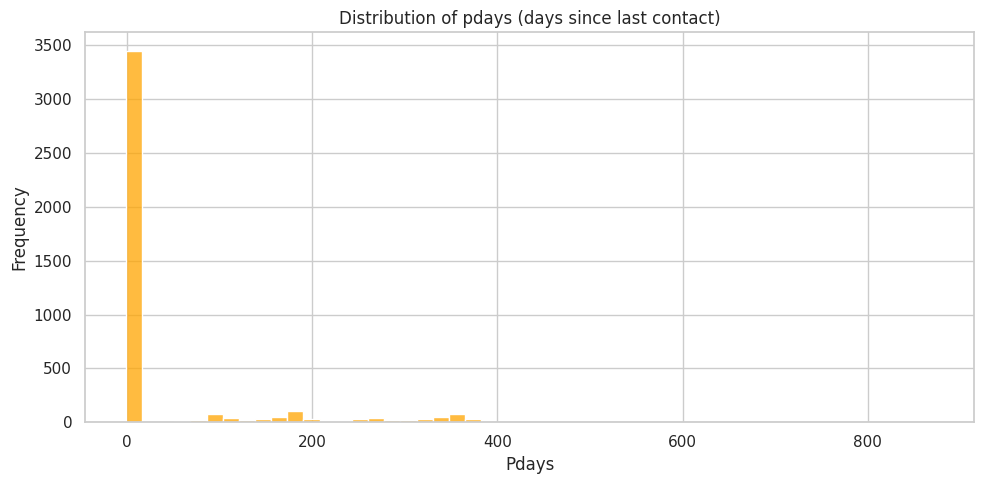

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['pdays'], bins=50, color='orange')
plt.title('Distribution of pdays (days since last contact)')
plt.xlabel('Pdays')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Observations:**

1. The majority of entries in pdays are -1, meaning most clients were never contacted before.

2. Few clients were contacted within a range of 1 to 871 days ago.

3. This feature is highly imbalanced and sparse.

4. For those with valid pdays, a shorter time since last contact may correlate with higher success.

### **3. Subscription Outcome by Job Type**

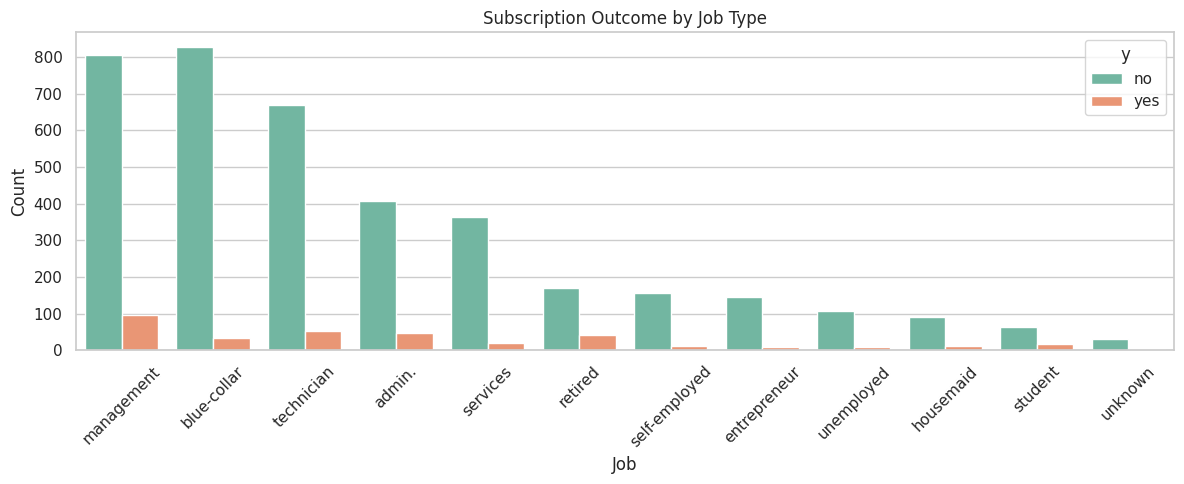

In [ ]:
plt.figure(figsize=(12, 5))
job_order = df['job'].value_counts().index  # Sort bars by job frequency
sns.countplot(data=df, x='job', hue='y', order=job_order, palette='Set2')
plt.title('Subscription Outcome by Job Type')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:**

1. High Subscription Potential (High “yes” bars relative to “no”). Retired clients show a higher proportion of subscriptions compared to most groups, despite lower overall numbers. Students and admin. also show relatively better conversion ratios.

2. Low Subscription Conversion (High “no” bars, few “yes”). Blue-collar, services, and technicians have large “no” bars and very low “yes” bars — indicating low responsiveness to marketing. Unknown job type has the least engagement overall.

3. Popular but Not Profitable Segments. Management and blue-collar jobs have the largest client bases, but still show low conversion rates — many contacted, few subscribed.

### **4. Subscription Outcome by Month**

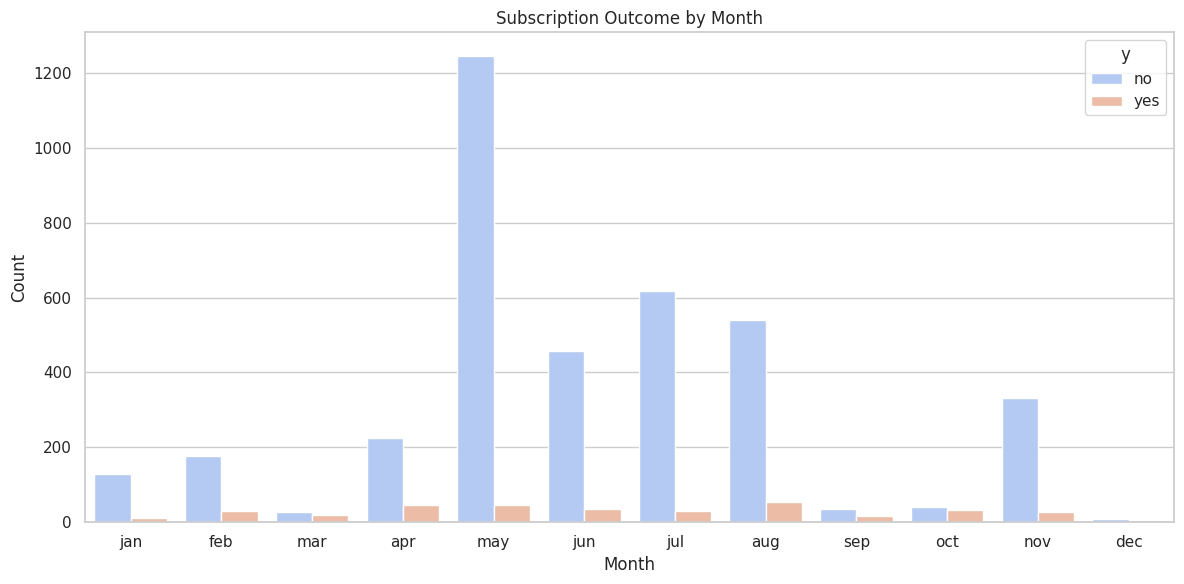

In [ ]:
plt.figure(figsize=(12, 6))
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
sns.countplot(data=df, x='month', hue='y', order=month_order, palette='coolwarm')
plt.title('Subscription Outcome by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Observation:

1. May had the highest number of calls, but also the highest number of non-subscriptions.

2. March, June, December show better conversion ratios (yes responses) compared to other months.

3. Campaign timing matters. May might be over-targeted with less effective messaging or client fatigue.

### **Feature Engineering**

In [6]:
# Convert target variable to numeric
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Create binary 'contacted_before' feature
df['contacted_before'] = df['pdays'].apply(lambda x: 0 if x == -1 else 1)

# Age group (young <30, middle-aged 30–50, senior >50)
age_bins = [0, 30, 50, np.inf]
age_labels = ['young', 'middle-aged', 'senior']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Duration group (short <200, medium 200–500, long >500 seconds)
duration_bins = [0, 200, 500, np.inf]
duration_labels = ['short', 'medium', 'long']
df['duration_group'] = pd.cut(df['duration'], bins=duration_bins, labels=duration_labels)

# Binary: Was the client contacted in a previous campaign?
df['contacted_before_campaign'] = (df['previous'] > 0).astype(int)

# Interaction feature: duration × contacted_before
df['duration_contacted'] = df['duration'] * df['contacted_before']

# View sample output
print(df[['age', 'age_group', 'duration', 'duration_group', 'previous', 'contacted_before_campaign', 'duration_contacted']].head())

   age    age_group  duration duration_group  previous  \
0   30        young        79          short         0   
1   33  middle-aged       220         medium         4   
2   35  middle-aged       185          short         1   
3   30        young       199          short         0   
4   59       senior       226         medium         0   

   contacted_before_campaign  duration_contacted  
0                          0                   0  
1                          1                 220  
2                          1                 185  
3                          0                   0  
4                          0                   0  


### **Predictive Modelling**

In [8]:
# Select features
features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
            'contact', 'month', 'poutcome', 'age_group', 'duration_group',
            'balance', 'campaign', 'pdays', 'previous', 'duration',
            'contacted_before', 'contacted_before_campaign', 'duration_contacted']
X = df[features]
y = df['y']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# One-hot encode categorical columns
categorical_features = X.select_dtypes(include='category').columns.tolist() + \
                       X.select_dtypes(include='object').columns.tolist()

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Create pipeline with logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=2000, class_weight='balanced', solver='liblinear'))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluation
print(" Class Distribution:\n", y.value_counts(normalize=True))
print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

 Class Distribution:
 y
0    0.915056
1    0.084944
Name: proportion, dtype: float64

 Accuracy: 0.8298887122416534

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      1151
           1       0.30      0.78      0.44       107

    accuracy                           0.83      1258
   macro avg       0.64      0.81      0.67      1258
weighted avg       0.92      0.83      0.86      1258


 Confusion Matrix:
 [[961 190]
 [ 24  83]]


**Class Distribution**

1. **91.5%** of the data shows people did not subscribe (no). **8.5%** shows people subscribed (yes). A problem of imbalanced classification.

**Key Metrics**

1. Precision: Of all the clients predicted as "yes", only 30% actually subscribed. This suggests some false positives.

2. Recall: The model correctly identified 78% of the actual subscribers.

3. F1 Score: Shows a moderate balance between precision and recall for the positive class.

4. Accuracy (~83%): Overall, the model is able to predict well, despite the class imbalance.

**Confusion Matrix**

1. True Negatives (961): Correctly predicted “no”

2. False Positives (190): Predicted “yes” but actually “no”

3. False Negatives (24): Predicted “no” but actually “yes” ❌

4. True Positives (83): Correctly predicted “yes” ✅

The low number of false negatives (24) suggests that they’re missing fewer potential clients, which is ideal for marketing.

There is a strong balance between finding actual subscribers (high recall) and maintaining reasonable overall accuracy.

A good model for marketing outreach, especially when the cost of contacting a non-subscriber is low, but missing a potential subscriber is costly.